In [231]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model, Sequential
from keras.layers import *
from keras import optimizers

In [232]:
train = pd.read_csv('/home/hasan/Desktop/DATA_SET/digit-recognizer/train.csv')
test = pd.read_csv('/home/hasan/Desktop/DATA_SET/digit-recognizer/test.csv')

In [233]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [236]:
#taking only values of the dataframe
train = train.values
test = test.values

In [237]:
#SPLITTING INTO TRAINING AND VALIDATION DATA

In [238]:
X_train = train[:,1:785].astype('float32')
Y_train = train[:,0].astype('int32')

X_test = test[:, 0:784].astype('float32')

In [239]:
#Checking the unique value and the classes

In [240]:
unique = np.unique(Y_train)
n_classes = len(unique)

print('Total unique numbers are : ',unique)
print('Total number of classes : ',n_classes)

Total unique numbers are :  [0 1 2 3 4 5 6 7 8 9]
Total number of classes :  10


In [241]:
#Data Preprocessing

In [242]:
#normalize the feature data
X_train /= 255
X_test /= 255

#reshaping data
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


#convert label to one hot encoding
Y_train = to_categorical(Y_train, num_classes=10)
print(Y_train[1])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [243]:
#Spliting training and validation data
X_train, x_validation, Y_train, y_validation = train_test_split(X_train, Y_train, test_size=.25, random_state=23)

In [244]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.15, height_shift_range=0.15)
datagen.fit(X_train)

In [245]:
#Model Filtering

In [246]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [247]:
#Compiling Model

In [248]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-3),
              metrics=['accuracy'])



In [249]:
#SUMMARY OF THE MODEL

In [250]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 64)      

In [251]:
#Training The Model

In [252]:
#reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=.2, patience=2)

In [253]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=70), epochs=20, verbose=2, validation_data=(x_validation, y_validation), callbacks = [reduce_lr])

Epoch 1/20
 - 104s - loss: 0.4733 - accuracy: 0.8511 - val_loss: 0.6388 - val_accuracy: 0.7991
Epoch 2/20
 - 78s - loss: 0.1488 - accuracy: 0.9558 - val_loss: 0.0616 - val_accuracy: 0.9815
Epoch 3/20
 - 77s - loss: 0.1118 - accuracy: 0.9685 - val_loss: 0.0731 - val_accuracy: 0.9784
Epoch 4/20
 - 75s - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0984 - val_accuracy: 0.9733
Epoch 5/20
 - 81s - loss: 0.0599 - accuracy: 0.9825 - val_loss: 0.0240 - val_accuracy: 0.9922
Epoch 6/20
 - 78s - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.0264 - val_accuracy: 0.9926
Epoch 7/20
 - 86s - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.0262 - val_accuracy: 0.9929
Epoch 8/20
 - 78s - loss: 0.0438 - accuracy: 0.9880 - val_loss: 0.0240 - val_accuracy: 0.9928
Epoch 9/20
 - 79s - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.0216 - val_accuracy: 0.9931
Epoch 10/20
 - 75s - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.0235 - val_accuracy: 0.9931
Epoch 11/20
 - 81s - loss: 0.0395 - accuracy: 0.9885 - val

In [254]:
# Plot training & validation accuracy values

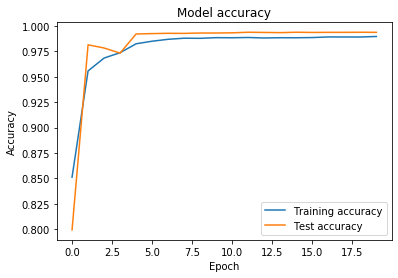

In [255]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'], loc='best')
plt.show()

In [256]:
# Plot training & validation loss values

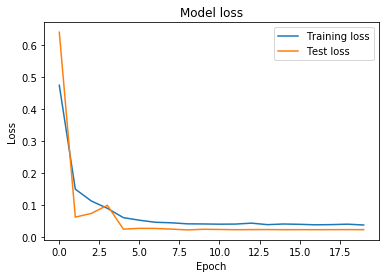

In [257]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Test loss'], loc='best')
plt.show()

In [258]:
#Confusion Matrix

Text(79.60000000000001, 0.5, 'predicted data')

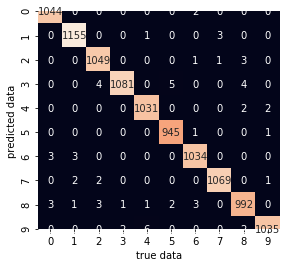

In [259]:
predicted_y_value = model.predict_classes(x_validation)
true_y_value = np.argmax(y_validation, axis=1)


mat = confusion_matrix(true_y_value, predicted_y_value)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true data')
plt.ylabel('predicted data')

In [260]:
#Predicting with X_test data

In [261]:
#this is a float value 
predict = model.predict(X_test)

#converting to integer number
predicted = np.argmax(predict, axis=1)
print(predicted.shape)
print(predicted)

(28000,)
[2 0 9 ... 3 9 2]


In [262]:
#PREDICTING WITH test DATA

In [263]:
predict1 = pd.DataFrame(predicted)
predict2 = pd.DataFrame(predict1)
predict2.head()

,0
0,2
1,0
2,9
3,0
4,3


In [264]:
predict2.shape

(28000, 1)

In [265]:
predict2.index.name = 'ImageID'
predict3 = predict2.rename(columns={0:'Label'}).reset_index()
predict3['ImageID'] = predict3['ImageID']+1
predict3.head()

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
